In [19]:
import pandas as pd
import seaborn as sns
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
%matplotlib inline

In [2]:
datos = pd.read_excel('Encuesta para tesis terminada_edit.xlsx')

In [3]:
categorical_features=identify_nominal_columns(datos)
# categorical_features

In [4]:
selected_column= datos[categorical_features]
categorical_df = selected_column.copy()

In [7]:
for column in categorical_df:
    categorical_df[column] = pd.Categorical(categorical_df[column]).codes

In [13]:
corr_matrix = categorical_df.corr()

<AxesSubplot: >

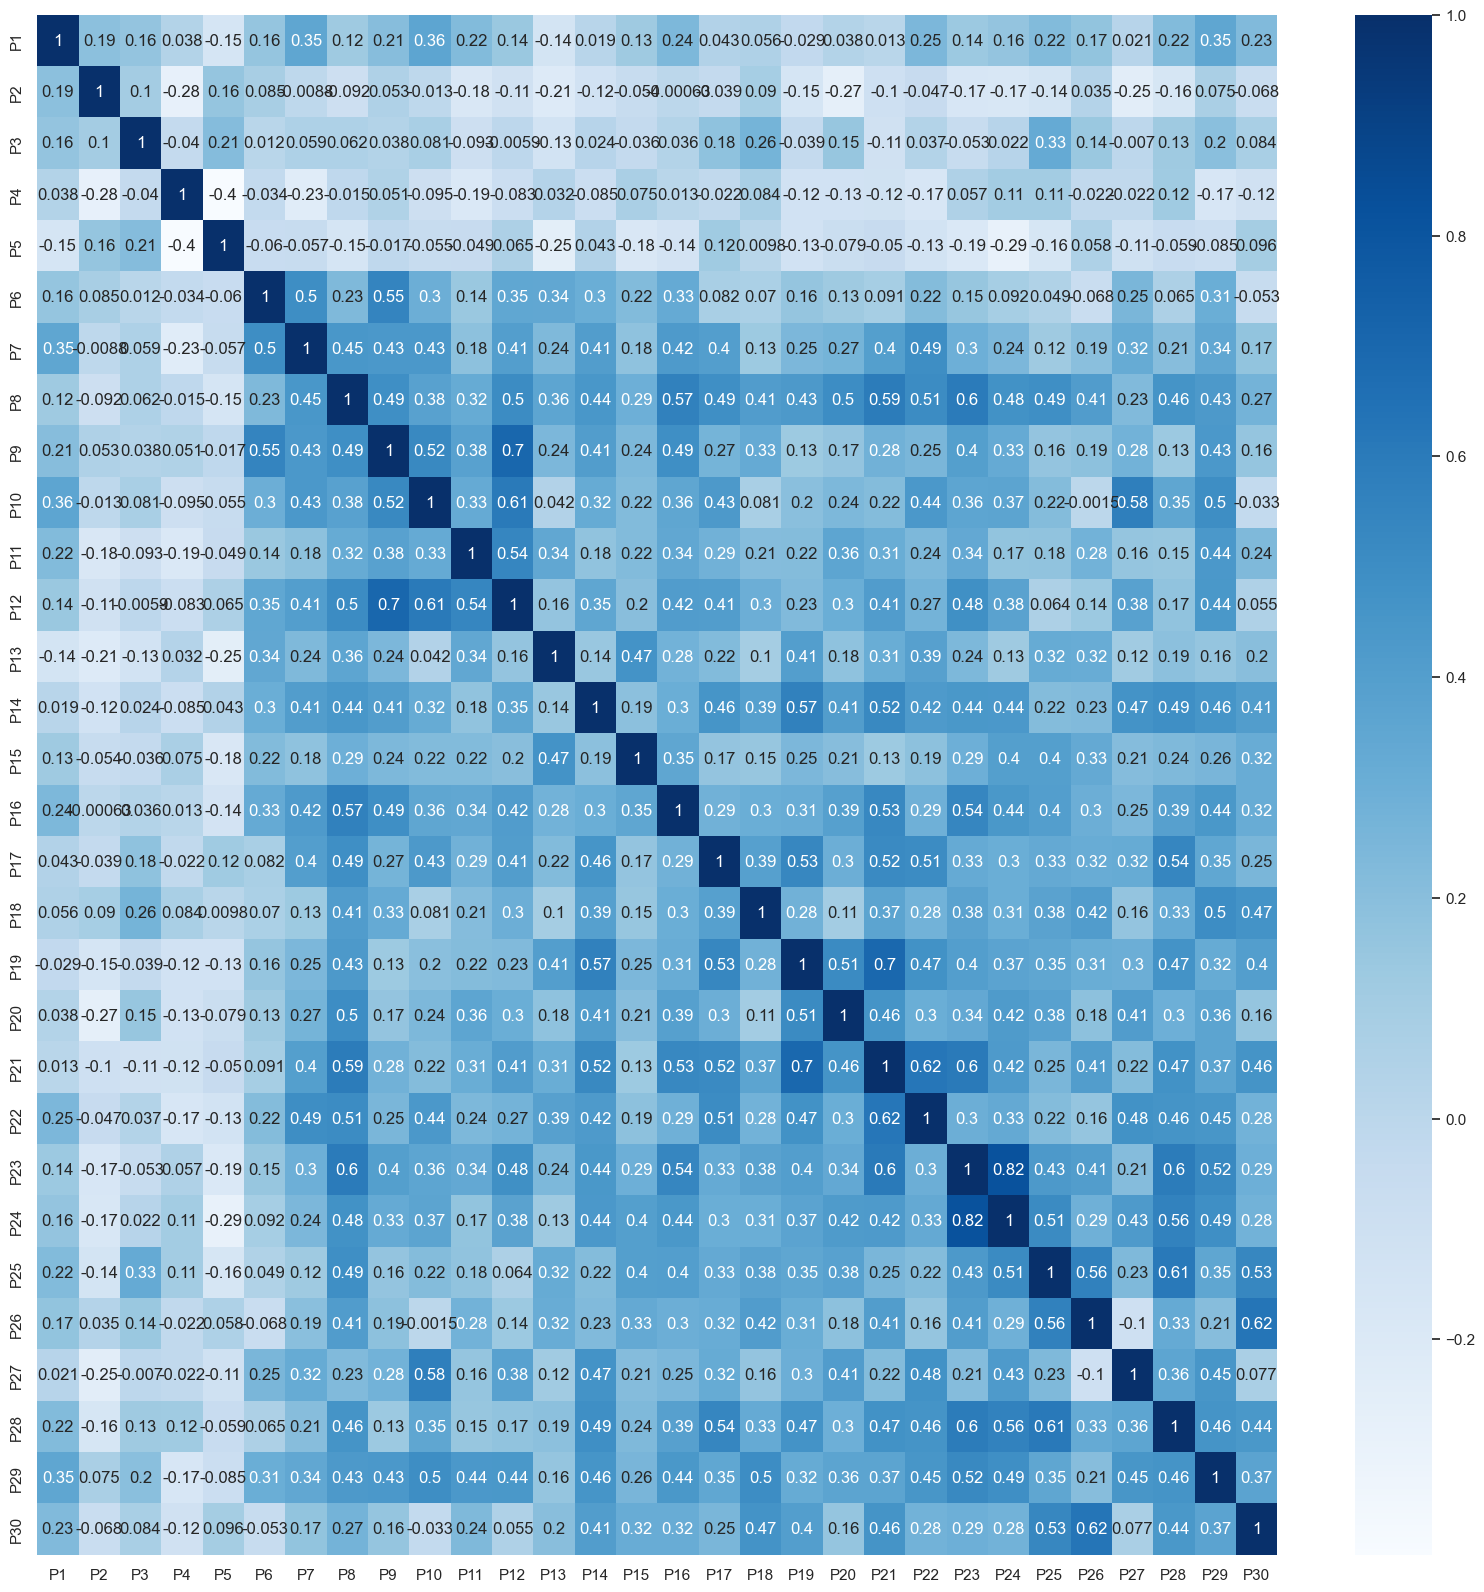

In [24]:
sns.set (rc = {"figure.figsize" :( 20 , 20 )})
sns.heatmap(corr_matrix, cmap="Blues", annot=True)